# Chapter 12 In-chapter examples

In [1]:
# import libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import spatial #(for cosine similarity)


In [2]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 12.1: Example of scatter plot showing correlated data

In [3]:
# number of sibling pairs
num_pairs = 40

In [4]:
# simulate ratings for brothers
brothers_ratings = np.random.randint(1,11,num_pairs)

In [5]:
# simulate correlated ratings for sisters based on brothers' ratings
noise = np.random.normal(0,2,num_pairs)  # random noise
sisters_ratings = brothers_ratings + noise  # sister's ratings are brother's ratings plus some noise

In [6]:
# make sure ratings are within bounds 1 and 10
sisters_ratings = np.clip(np.round(sisters_ratings),1,10)

In [7]:
# correlation
r = stats.pearsonr(brothers_ratings,sisters_ratings)[0]

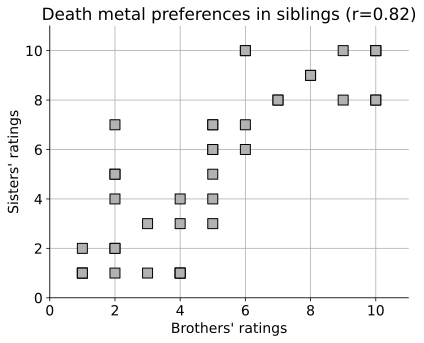

In [8]:
# scatter plot
plt.figure(figsize=(6,5))
plt.plot(brothers_ratings, sisters_ratings,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
plt.title(f'Death metal preferences in siblings (r={r:.2f})',loc='center')
plt.xlabel("Brothers' ratings")
plt.ylabel("Sisters' ratings")
plt.xlim(0,11)
plt.ylim(0,11)
plt.grid(True)

# display the figure
plt.tight_layout()
plt.show()

### Fig 12.2: Different correlation coefficients

In [9]:
# correlation values
rs = [ 1,.7,.2,0,0,0,-.2,-.7,-1 ]

In [10]:
# sample size
n = 188

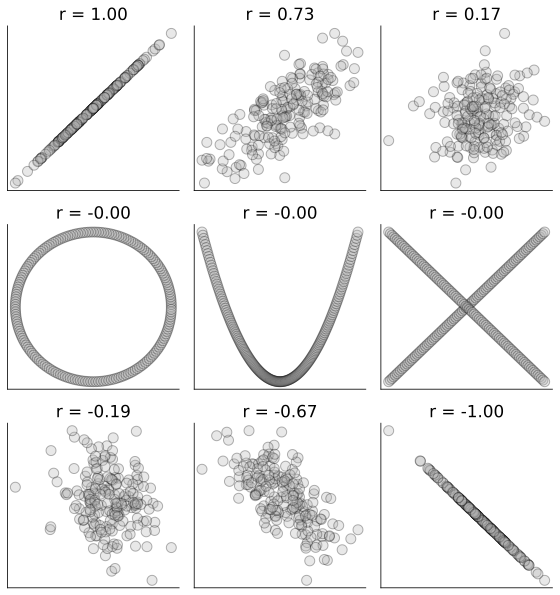

In [11]:
# plot
_,axs = plt.subplots(3,3,figsize=(8,8.5))

for r,ax,i in zip(rs,axs.flatten(),range(9)):

  # generate data
  x = np.random.randn(n)
  y = x*r + np.random.randn(n)*np.sqrt(1-r**2)

  # exceptions for r=0
  if i==3:
    x = np.cos(np.linspace(0,2*np.pi-2*np.pi/n,n))
    y = np.sin(np.linspace(0,2*np.pi-2*np.pi/n,n))
  elif i==4:
    x = np.linspace(-2,2,n)
    y = x**2
  elif i==5:
    x = np.linspace(-2,2,n//2)
    y = np.concatenate((x,-x),0)
    x = np.concatenate((x,x),0)

  # empirical correlation
  rho = np.corrcoef(x,y)[0,1]

  # plot
  ax.plot(x,y,'ko',markersize=10,markerfacecolor=(.7,.7,.7),alpha=.3)
  ax.set(xticks=[],yticks=[])
  ax.set_title(f'r = {rho:.2f}',loc='center')


# display the figure
plt.tight_layout()
plt.show()

### Fig 12.3: Same correlation, different slopes

In [12]:
n = 100


In [13]:
# Dataset 1
x1 = np.random.normal(100,10,n)
y1 = .3*x1 + np.random.randn(n)*3
slope1,intercept1,r1,_,_ = stats.linregress(x1,y1)

In [14]:
# Dataset 2
x2 = np.random.normal(10,1,n) + np.mean(x1)
y2 = 3*x2 + np.random.randn(n)*3
slope2,intercept2,r2,_,_ = stats.linregress(x2,y2)

In [15]:
# x-axis limits
xmin,xmax = np.min(x1)-5,np.max(x1)+5


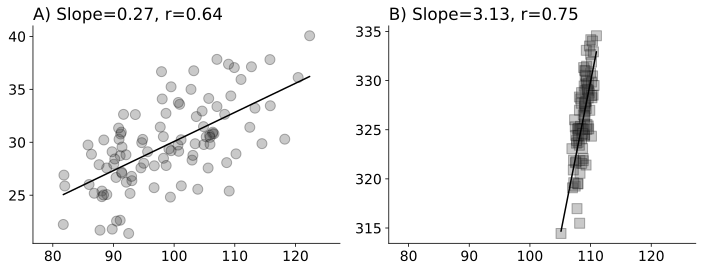

In [16]:
# Plot (datasets and their regression lines)
_,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(x1,y1,'ko',markersize=10,markerfacecolor=(.3,.3,.3),alpha=.3)
axs[0].plot(x1,intercept1 + slope1*x1,'k')
axs[0].set_title(fr'A) Slope={slope1:.2f}, r={r1:.2f}')
axs[0].set(xlim=[xmin,xmax])

axs[1].plot(x2,y2,'ks',markersize=10,markerfacecolor=(.3,.3,.3),alpha=.3)
axs[1].plot(x2, intercept2 + slope2*x2,'k')
axs[1].set_title(fr'B) Slope={slope2:.2f}, r={r2:.2f}')
axs[1].set(xlim=[xmin,xmax])

# display the figure
plt.tight_layout()
plt.show()

### numpy vs scipy

#### Vector input

In [17]:
# vector input
x = np.random.randn(50)
y = x + np.random.randn(len(x))/2
     

In [18]:
usingScipy = stats.pearsonr(x,y)
usingNumpy = np.corrcoef(x,y)

In [19]:
print('scipy.stats.pearsonr:')
print(usingScipy)

scipy.stats.pearsonr:
PearsonRResult(statistic=0.8732243148790818, pvalue=1.349844856753414e-16)


In [20]:
print('numpy.corrcoef:')
print(usingNumpy)

numpy.corrcoef:
[[1.         0.87322431]
 [0.87322431 1.        ]]


#### Matrix input

In [21]:
# matrix input (features by observations)
X = np.vstack((x[None,:],y[None,:]))

In [22]:
# usingScipy = stats.pearsonr(X) ## gives an error!
usingNumpy = np.corrcoef(X)

In [23]:
print('numpy.corrcoef:')
print(usingNumpy)

numpy.corrcoef:
[[1.         0.87322431]
 [0.87322431 1.        ]]


#### Matrix of R and p values

In [24]:
R = np.zeros((2,2))
P = np.zeros((2,2))

In [25]:
# Calculate Pearson correlation for each pair of variables
for i in range(2):
  for j in range(2):
    R[i,j], P[i,j] = stats.pearsonr(X[i,:],X[j,:])


In [26]:
print('Correlation matrix:')
print(R)

print('')
print('Associated p-values:')
print(P)

Correlation matrix:
[[1.         0.87322431]
 [0.87322431 1.        ]]

Associated p-values:
[[0.00000000e+00 1.34984486e-16]
 [1.34984486e-16 0.00000000e+00]]


### Creating correlated data

#### Method 1

In [27]:
# Method 1 (quick but effective)
x = np.random.randn(40)
y = x + np.random.randn(len(x))
r = stats.pearsonr(x,y).statistic

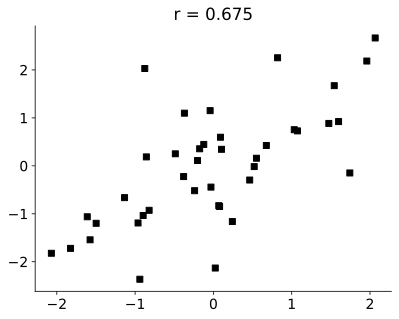

In [28]:
# plot
plt.plot(x,y,'ks')
plt.title(f'r = {r:.3f}',loc='center')
plt.show()

#### Method 2

In [29]:
# method 2 (more control over the correlation)
r = .4
x = np.random.randn(50)
y = np.random.randn(len(x))
y = x*r + y*np.sqrt(1-r**2)

In [30]:
rr = stats.pearsonr(x,y).statistic

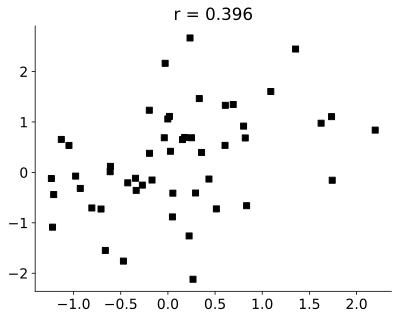

In [31]:
# plot
plt.plot(x,y,'ks')
plt.title(f'r = {rr:.3f}',loc='center')
plt.show()

#### Method 3

In [32]:
# method 3: multivariate
C = np.array([ [1,.4],[.4,1] ])
means = np.zeros(2)

In [33]:
X = np.random.multivariate_normal(means,C,50)
r = np.corrcoef(X.T)

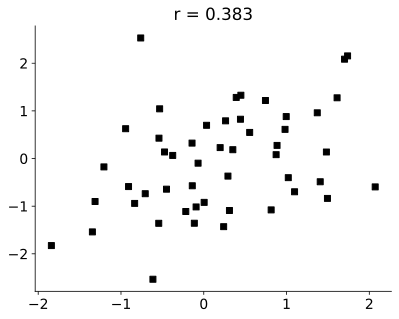

In [34]:
# plot
plt.plot(X[:,0],X[:,1],'ks')
plt.title(f'r = {r[0,1]:.3f}',loc='center')
plt.show()

### Fig 12.6: Anscobe's quartet

In [35]:
anscombe = np.array([
     # series 1     series 2      series 3       series 4
    [10,  8.04,    10,  9.14,    10,  7.46,      8,  6.58, ],
    [ 8,  6.95,     8,  8.14,     8,  6.77,      8,  5.76, ],
    [13,  7.58,    13,  8.76,    13, 12.74,      8,  7.71, ],
    [ 9,  8.81,     9,  8.77,     9,  7.11,      8,  8.84, ],
    [11,  8.33,    11,  9.26,    11,  7.81,      8,  8.47, ],
    [14,  9.96,    14,  8.10,    14,  8.84,      8,  7.04, ],
    [ 6,  7.24,     6,  6.13,     6,  6.08,      8,  5.25, ],
    [ 4,  4.26,     4,  3.10,     4,  5.39,      8,  5.56, ],
    [12, 10.84,    12,  9.13,    12,  8.15,      8,  7.91, ],
    [ 7,  4.82,     7,  7.26,     7,  6.42,      8,  6.89, ],
    [ 5,  5.68,     5,  4.74,     5,  5.73,     19, 12.50, ]
    ])

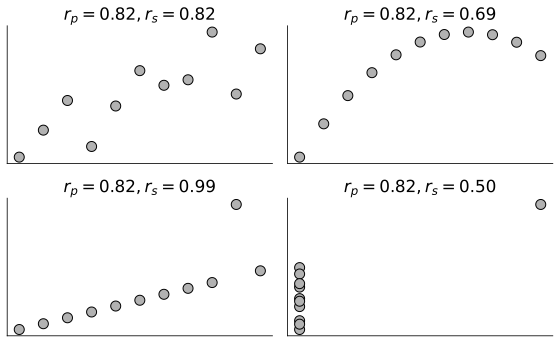

In [36]:
# plot data and correlations
fig,ax = plt.subplots(2,2,figsize=(8,5))
ax = ax.ravel()

for i in range(4):

  # plot the points
  ax[i].plot(anscombe[:,i*2],anscombe[:,i*2+1],'ko',markersize=10,markerfacecolor=(.7,.7,.7))

  # compute the corrs
  corr_p = stats.pearsonr(anscombe[:,i*2],anscombe[:,i*2+1])[0]
  corr_s = stats.spearmanr(anscombe[:,i*2],anscombe[:,i*2+1])[0]

  # update the axis
  ax[i].set(xticks=[],yticks=[])
  ax[i].set_title(f'$r_p = {corr_p:.2f},  r_s = {corr_s:.2f}$',loc='center')

# display the figure
plt.tight_layout()
plt.show()

### Fig 12.7: Kandall tau

In [37]:
# The data
bro = np.array([ 1,2,3,4,5 ])
sis = np.array([ 2,1,4,5,3 ])

In [38]:
# the correlation
k = stats.kendalltau(bro,sis)

In [39]:
# band names 
bands = [ 'Unicorn Apocalypse',
          "Satan's Fluffy Bunnies",
          'Demonic Dishwashers',
          'Vampiric Vegetarians',
          'Zombie Zucchini Zephyr' ]

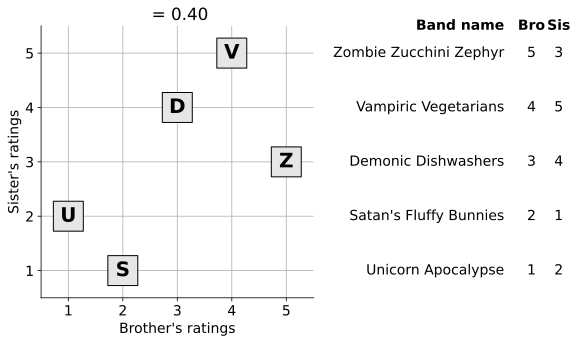

In [40]:
# the plot
_,ax = plt.subplots(1,figsize=(16,5)) # figsize wrong in original repo
ax.plot(bro,sis,'ks',markersize=30,markerfacecolor=(.9,.9,.9))
ax.set(xlabel="Brother's ratings",ylabel="Sister's ratings",
       yticks=range(1,6),xticks=range(1,6),
       xlim=[.5,5.5],ylim=[.5,5.5])
ax.grid()
ax.set_title(fr' = {k[0]:.2f}',loc='center')



# band names
for i in range(len(bro)):

  # band names in plot markers
  ax.text(bro[i],sis[i],bands[i][0],size=20,
           weight='bold',va='center',ha='center')

  # raw data
  ax.text(9,i+1,bands[i],ha='right',va='center')
  ax.text(9.5,i+1,bro[i],ha='center',va='center')
  ax.text(10,i+1,sis[i],ha='center',va='center')

# column labels
ax.text(9,5.5,'Band name',ha='right',va='center',weight='bold')
ax.text(9.5,5.5,'Bro',ha='center',va='center',weight='bold')
ax.text(10,5.5,'Sis',ha='center',va='center',weight='bold')


# show figure
plt.tight_layout()
plt.show()

### 12.8: Statistical significance of r based on n

In [41]:
# simulation ranges
rs = np.linspace(.1,.8,53) # r values
ns = np.arange(10,511,step=25) # sample sizes

In [42]:
# compute the matrix of t-values
num = rs[:,None]*np.sqrt(ns-2)
den = np.sqrt(1-rs[:,None]**2)
tmat = num/den

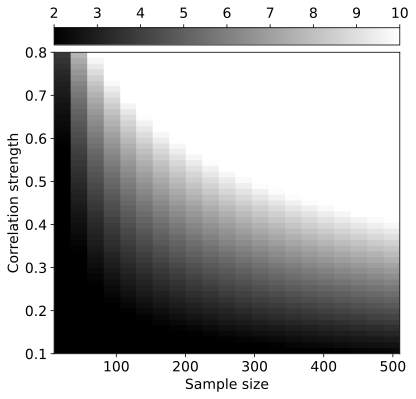

In [43]:
# the matrix
fig,ax = plt.subplots(1,figsize=(6,6))

cax = ax.imshow(tmat,vmin=2,vmax=10,aspect='auto',cmap='gray',
           extent=[ns[0],ns[-1],rs[0],rs[-1]],origin='lower')
ax.set(xlabel='Sample size',ylabel='Correlation strength')

# and make it look a bit nicer
fig.colorbar(cax,orientation='horizontal',pad=.02,ax=ax,location='top')
ax.spines[['right','top']].set_visible(True)

# display figure
plt.tight_layout()
plt.show()

### Fig 12.9: fisher-z transform on uniform data

In [44]:
# "correlation" data and its Fisher transform
r = np.random.uniform(-1,1,size=1000)
fish_r = np.arctanh(r)

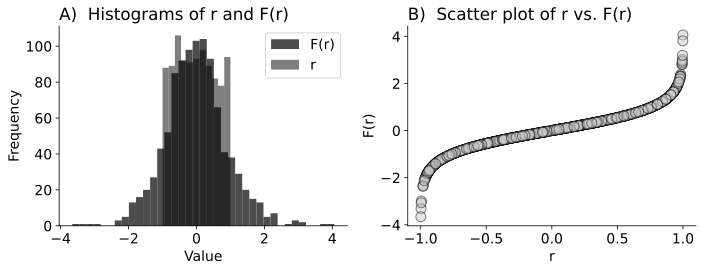

In [45]:
# plotting
fig,axs = plt.subplots(1,2,figsize=(10,4))

# histograms
axs[0].hist(fish_r, bins='fd', color=(.3,.3,.3),alpha=1, label='F(r)')
axs[0].hist(r,bins='fd', color='k', alpha=.5, label='r')
axs[0].legend(loc='upper right')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title(r'A)  Histograms of r and F(r)')

# scatter plot to visualize the transform
axs[1].plot(r,fish_r,'ko',markersize=10,alpha=.5,markerfacecolor=(.8,.8,.8))
axs[1].set_xlabel('r')
axs[1].set_ylabel('F(r)')
axs[1].set_title(r'B)  Scatter plot of r vs. F(r)')

# display the figure
plt.tight_layout()
plt.show()

### Fig 12.10: fisher z transform on numbers close to zero

same as last example but with simulated H0 coefficients

In [46]:
# random data
X = np.random.randn(100,45)

In [47]:
# compute the correlation matrix and extract the unique r values
R = np.corrcoef(X.T)
utri = np.triu(R,k=1)
r = utri[utri!=0]

In [48]:
# fisher transform
fish_r = np.arctanh(r)

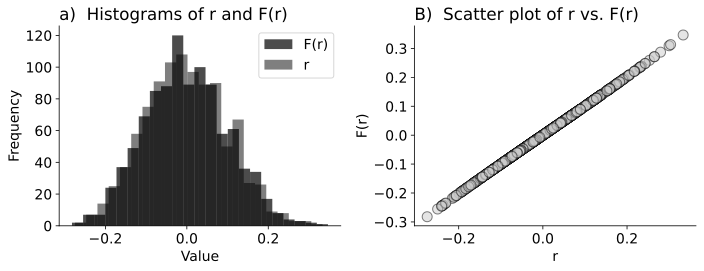

In [49]:
# plotting
fig,axs = plt.subplots(1,2,figsize=(10,4))

# histograms
axs[0].hist(fish_r, bins='fd', color=(.3,.3,.3),alpha=1, label='F(r)')
axs[0].hist(r,bins='fd', color='k', alpha=.5, label='r')
axs[0].legend(loc='upper right')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title(r'a)  Histograms of r and F(r)')

# scatter plot to visualize the transform
axs[1].plot(r,fish_r,'ko',markersize=10,alpha=.5,markerfacecolor=(.8,.8,.8))
axs[1].set_xlabel('r')
axs[1].set_ylabel('F(r)')
axs[1].set_title(r'B)  Scatter plot of r vs. F(r)')

# display the figure
plt.tight_layout()
plt.show()

### Fig 12.11: subgroups paradox

In [50]:
# initializations
n = 20 # sample points per group
offsets = [2, 3.5, 5] # mean offsets

allx = np.array([])
ally = np.array([])

s = 'so^' # marker shapes

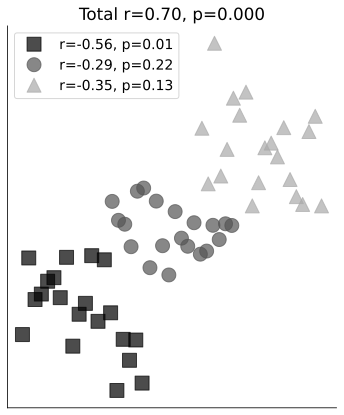

In [51]:
# generate and plot data
plt.figure(figsize=(5,6))
for datai in range(3):

  # generate data
  x = np.linspace(offsets[datai]-1,offsets[datai]+1,n)
  y = -x/3 + np.mean(x) + np.random.randn(n)/3

  # subgroup correlation
  r,p = stats.pearsonr(x,y)

  # plot
  plt.plot(x,y,s[datai],color=(datai/3,datai/3,datai/3),
           markersize=14,alpha=.7,label=f'r={r:.2f}, p={p:.2f}')

  # gather the data into one array
  allx = np.append(allx,x)
  ally = np.append(ally,y)



# % now correlate the groups
[r,p] = stats.pearsonr(allx,ally)
plt.title(f'Total r={r:.2f}, p={p:.3f}',loc='center')

plt.xticks([])
plt.yticks([])
plt.legend()

# display the figure
plt.tight_layout()
plt.show()

### Cosine similarity

In [52]:
# variables
x = np.array([ 1,2,3,4 ])
y = np.array([ 1,2,3,4 ])
z = np.array([ 101,102,103,104])

In [53]:
# correlations
r_xy = np.corrcoef(x,y)[0,1]
r_xz = np.corrcoef(x,z)[0,1]

In [54]:
# cosine similarities
c_xy = 1-spatial.distance.cosine(x,y)
c_xz = 1-spatial.distance.cosine(x,z)


In [55]:
# print out the results
print(f'r_xy: {r_xy:.3f}')
print(f'c_xy: {c_xy:.3f}')
print('')
print(f'r_xz: {r_xz:.3f}')
print(f'c_xz: {c_xz:.3f}')

r_xy: 1.000
c_xy: 1.000

r_xz: 1.000
c_xz: 0.917
